In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from colorama import Fore

In [2]:
# macd strategy
# predictions = pd.read_csv('training_data_non_model.csv')
predictions = pd.read_csv('testing_data_non_model.csv')
increase_factor = 1.5

In [3]:
# dataset = predictions.copy()
dataset = predictions.copy()

In [4]:
dataset["new_rfr"] = dataset["daily_risk_free_rate"] * increase_factor

In [5]:
def ewma(data, window):
    return data.ewm(span=window).mean()

twelve_day_ewma = ewma(dataset['Close'], 12)
twenty_six_day_ewma = ewma(dataset['Close'], 26)

macd = twelve_day_ewma - twenty_six_day_ewma
macd_signal = ewma(macd, 9)
macd_hist = macd - macd_signal

In [6]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,return,excess return,daily_risk_free_rate,new_rfr
0,2018-03-14,34.410000,34.680000,34.410000,34.630001,29.946875,91300,0.785757,0.785700,0.000056,0.000085
1,2018-03-15,34.619999,34.680000,34.560001,34.639999,29.955515,40200,0.028851,0.028794,0.000057,0.000085
2,2018-03-16,34.520000,34.549999,34.439999,34.520000,29.851736,42000,-0.346444,-0.346500,0.000057,0.000085
3,2018-03-19,34.369999,34.560001,34.330002,34.410000,29.756618,55000,-0.318635,-0.318691,0.000057,0.000085
4,2018-03-20,34.230000,34.340000,34.230000,34.270000,29.635569,34500,-0.406797,-0.406854,0.000057,0.000086
...,...,...,...,...,...,...,...,...,...,...,...
448,2019-12-23,39.290001,39.320000,39.060001,39.160000,35.542130,419900,-0.203840,-0.203901,0.000062,0.000092
449,2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660110,164100,0.331944,0.331883,0.000062,0.000092
450,2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750870,242300,0.254514,0.254453,0.000062,0.000092
451,2019-12-27,39.459999,39.509998,39.419998,39.419998,35.778091,155700,0.076141,0.076079,0.000062,0.000092


In [7]:
dataset['12-ewma'] = twelve_day_ewma
dataset['26-ewma'] = twenty_six_day_ewma
dataset['MACD'] = macd
dataset['MACD Signal'] = macd_signal
dataset['MACD Hist'] = macd_hist

In [8]:
def find_signal(dataset):
    data = dataset.copy()
    data["signal"] = 0
    
    for i in range(1, len(data)):
        # we buy if the MACD line crosses above the signal line
        if data['MACD'].iloc[i] > data['MACD Signal'].iloc[i] and data['MACD'].iloc[i-1] < data['MACD Signal'].iloc[i-1]:
            data.loc[i, 'signal'] = 1
            
        # we sell if the MACD line crosses below the signal line
        elif data['MACD'].iloc[i] < data['MACD Signal'].iloc[i] and data['MACD'].iloc[i-1] > data['MACD Signal'].iloc[i-1]:
            data.loc[i, 'signal'] = -1
        else:
            data.loc[i, 'signal'] = 0
    return data

dataset = find_signal(dataset)
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,return,excess return,daily_risk_free_rate,new_rfr,12-ewma,26-ewma,MACD,MACD Signal,MACD Hist,signal
0,2018-03-14,34.410000,34.680000,34.410000,34.630001,29.946875,91300,0.785757,0.785700,0.000056,0.000085,34.630001,34.630001,0.000000,0.000000,0.000000,0
1,2018-03-15,34.619999,34.680000,34.560001,34.639999,29.955515,40200,0.028851,0.028794,0.000057,0.000085,34.635417,34.635192,0.000224,0.000125,0.000100,0
2,2018-03-16,34.520000,34.549999,34.439999,34.520000,29.851736,42000,-0.346444,-0.346500,0.000057,0.000085,34.590369,34.593805,-0.003435,-0.001334,-0.002101,-1
3,2018-03-19,34.369999,34.560001,34.330002,34.410000,29.756618,55000,-0.318635,-0.318691,0.000057,0.000085,34.533434,34.542421,-0.008987,-0.003927,-0.005060,0
4,2018-03-20,34.230000,34.340000,34.230000,34.270000,29.635569,34500,-0.406797,-0.406854,0.000057,0.000086,34.461860,34.479245,-0.017386,-0.007930,-0.009455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2019-12-23,39.290001,39.320000,39.060001,39.160000,35.542130,419900,-0.203840,-0.203901,0.000062,0.000092,39.514002,39.703280,-0.189278,-0.106898,-0.082380,0
449,2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660110,164100,0.331944,0.331883,0.000062,0.000092,39.479540,39.672667,-0.193127,-0.124144,-0.068983,0
450,2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750870,242300,0.254514,0.254453,0.000062,0.000092,39.465765,39.651728,-0.185964,-0.136508,-0.049456,0
451,2019-12-27,39.459999,39.509998,39.419998,39.419998,35.778091,155700,0.076141,0.076079,0.000062,0.000092,39.458724,39.634563,-0.175840,-0.144374,-0.031465,0


In [9]:
dataset.index = pd.to_datetime(dataset['Date'])

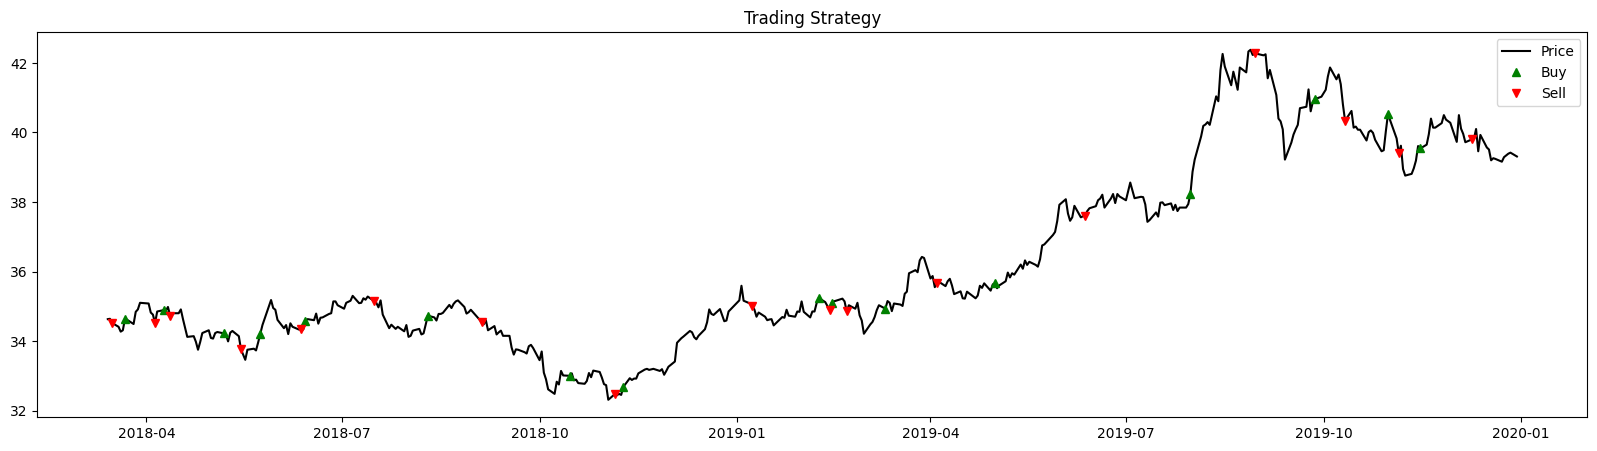

In [10]:
plt.figure(figsize=(20, 5))

plt.title('Trading Strategy')

# Plot main price line
plt.plot(dataset.index,dataset['Close'], label='Price', color='black')

# Differentiate buy and sell signals with markers and colors
buy_signals = dataset[dataset['signal'] == 1].index
sell_signals = dataset[dataset['signal'] == -1].index

plt.plot(buy_signals, dataset['Close'][buy_signals], marker='^', linestyle='', color='green', label='Buy')  # Green triangle for buy
plt.plot(sell_signals, dataset['Close'][sell_signals], marker='v', linestyle='', color='red', label='Sell')  # Red triangle for sell

plt.legend()
plt.show()

In [11]:
inital_cash = 200000
leverage_factor = 10

margin = [inital_cash]
margin_high = [inital_cash]

position = [0]

cash = [inital_cash]
cash_high = [inital_cash]

previous_signal = 0
re = [0]

bank_account = [0]
high_bank_account = [0]

for i in range(0, len(dataset)-1):
    current_signal = dataset['signal'].iloc[i]
    current_price = dataset['Close'].iloc[i]
    
    current_rfr = dataset['daily_risk_free_rate'].iloc[i]
    current_high_rfr = dataset['new_rfr'].iloc[i]
    
    current_position = position[-1]
    
    current_cash = cash[-1]
    current_cash_high = cash_high[-1]
    
    current_bank_account = bank_account[-1]
    current_high_bank_account = high_bank_account[-1]
    
    current_margin = margin[-1]
    current_margin_high = margin_high[-1]
    
    current_re = re[-1]
    
    if abs(current_position * current_price) > current_margin * leverage_factor:
        if current_position > 0:
            excess_return = current_position * current_price - current_margin * leverage_factor
            excess_stock = excess_return / current_price
            current_position -= excess_stock
            current_bank_account += excess_return
        elif current_position < 0:
            excess_return = -current_position * current_price - current_margin * leverage_factor
            excess_stock = excess_return / current_price
            current_position += excess_stock
    
    if current_position > 0:
        current_re = (current_price - previous_price) / previous_price
        today_profits = (current_position * previous_price) * (current_re - current_rfr)
        today_profits_highrfr = (current_position * previous_price) * (current_re - current_high_rfr)
        
        current_margin += today_profits
        current_margin_high += today_profits_highrfr
    
    if current_position < 0:
        
        current_re = (previous_price - current_price) / previous_price
        today_profits = (current_position * previous_price) * (current_re + current_rfr)
        today_profits_highrfr = (current_position * previous_price) * (current_re + current_high_rfr)
        
        current_margin += today_profits
        current_margin_high += today_profits_highrfr
    
    if current_signal == 1:
        # if we are already in a short position, then we close the short position
        if previous_signal == -1:
            current_position = 0
            previous_signal = 0
            
        # if we closed the short position, or we are in a initial position, then we buy
        if previous_signal == 0:
        
            stock_to_buy = (current_margin * leverage_factor) / current_price
            current_position += stock_to_buy
            long_price = current_price
            
            previous_signal = 1

    if current_signal == -1:
        if previous_signal == 1:
            current_position = 0
            previous_signal = 0
        
        if previous_signal == 0:
            
            stock_to_borrow = (current_margin * leverage_factor) / current_price
            current_position -= stock_to_borrow
            short_price = current_price
            
            previous_signal = -1
            
    previous_price = current_price
    
    current_high_bank_account = current_bank_account
    
    current_interest = current_bank_account * current_rfr
    current_high_interest = current_high_bank_account * current_high_rfr
    
    current_bank_account += current_interest
    current_high_bank_account += current_high_interest
    
    current_cash = current_bank_account
    current_cash += current_margin
    
    current_cash_high = current_high_bank_account
    current_cash_high += current_margin_high
    
    re.append(current_re)
    
    margin.append(current_margin)
    margin_high.append(current_margin_high)
    
    position.append(current_position)
    
    cash.append(current_cash)
    cash_high.append(current_cash_high)
    
    bank_account.append(current_bank_account)
    high_bank_account.append(current_high_bank_account)

current_price = dataset['Close'].iloc[-1]
current_bank_account = bank_account[-1]

current_interest = current_bank_account * current_rfr
current_high_interest = current_high_bank_account * current_high_rfr

current_bank_account += current_interest
current_high_bank_account += current_high_interest

current_margin = margin[-1]
current_margin_high = margin_high[-1]

current_position = position[-1]

current_cash = cash[-1]
current_cash_high = cash_high[-1]

if current_position > 0:
    current_re = (current_price - previous_price) / previous_price
    
    profits = (current_position * previous_price) * (current_re - current_rfr)
    profits_high = (current_position * previous_price) * (current_re - current_high_rfr)
    
    current_margin += profits
    current_margin_high += profits_high
    
    current_position = 0
    
if current_position < 0:
    
    current_re = (previous_price - current_price) / previous_price
    
    profits = (current_position * previous_price) * (current_re + current_rfr)
    profits_high = (current_position * previous_price) * (current_re + current_high_rfr)
    
    current_margin += profits
    current_margin_high += profits_high
    
    current_position = 0
    
current_cash = current_bank_account
current_cash += current_margin

current_cash_high = current_high_bank_account
current_cash_high += current_margin_high

position.append(current_position)

bank_account.append(current_bank_account)
high_bank_account.append(current_high_bank_account)

re.append(current_re)

margin.append(current_margin)
margin_high.append(current_margin_high)

cash.append(current_cash)
cash_high.append(current_cash_high)

In [12]:
report_df = pd.DataFrame({
    'margin': margin[1:],
    "margin_high_rfr": margin_high[1:],
    'position': position[1:],
    'cash': cash[1:],
    "cash_with_high_rfr": cash_high[1:],
    "bank_account": bank_account[1:],
    "bank_account_with_high_rfr": high_bank_account[1:],
    'excess_return': re[1:],
})
report_df.index = dataset.index

In [13]:
target_data = dataset.copy()
target_data = target_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close', "excess return", "return", "12-ewma", "26-ewma", "MACD", "MACD Signal", "MACD Hist"])
final_result = pd.concat([target_data, report_df], axis=1)

In [14]:
final_result["theta"] = final_result["position"] * final_result["Close"]

final_result["pnl"] = final_result["margin"] - final_result["margin"].shift(1)
final_result["pnl_capital"] = final_result["bank_account"] - final_result["bank_account"].shift(1)
final_result["pnl_total"] = final_result["cash"] - final_result["cash"].shift(1)

final_result["cumulative_pnl"] = final_result["pnl"].cumsum()
final_result["cumulative_pnl_capital"] = final_result["pnl_capital"].cumsum()
final_result["cumulative_pnl_total"] = final_result["pnl_total"].cumsum()

final_result["turn_over_theta"] = abs(final_result["theta"] - final_result["theta"].shift(1))
final_result["turn_over_theta"] = final_result["turn_over_theta"].fillna(0)
final_result["cumulative_turn_over_theta"] = final_result["turn_over_theta"].cumsum()
final_result["turn_over_units"] = abs(final_result["position"] - final_result["position"].shift(1))
final_result["turn_over_units"] = final_result["turn_over_units"].fillna(0)
final_result["Upper_bound"] = final_result["margin"] * leverage_factor
final_result["Lower_bound"] = -final_result["margin"] * leverage_factor

final_result["pnl_150"] = final_result["margin_high_rfr"] - final_result["margin_high_rfr"].shift(1)
final_result["pnl_capital_150"] = final_result["bank_account_with_high_rfr"] - final_result["bank_account_with_high_rfr"].shift(1)
final_result["pnl_total_150"] = final_result["cash_with_high_rfr"] - final_result["cash_with_high_rfr"].shift(1)

final_result["cumulative_pnl_150"] = final_result["pnl_150"].cumsum()
final_result["cumulative_pnl_capital_150"] = final_result["pnl_capital_150"].cumsum()
final_result["cumulative_pnl_total_150"] = final_result["pnl_total_150"].cumsum()
final_result.fillna(0, inplace=True)

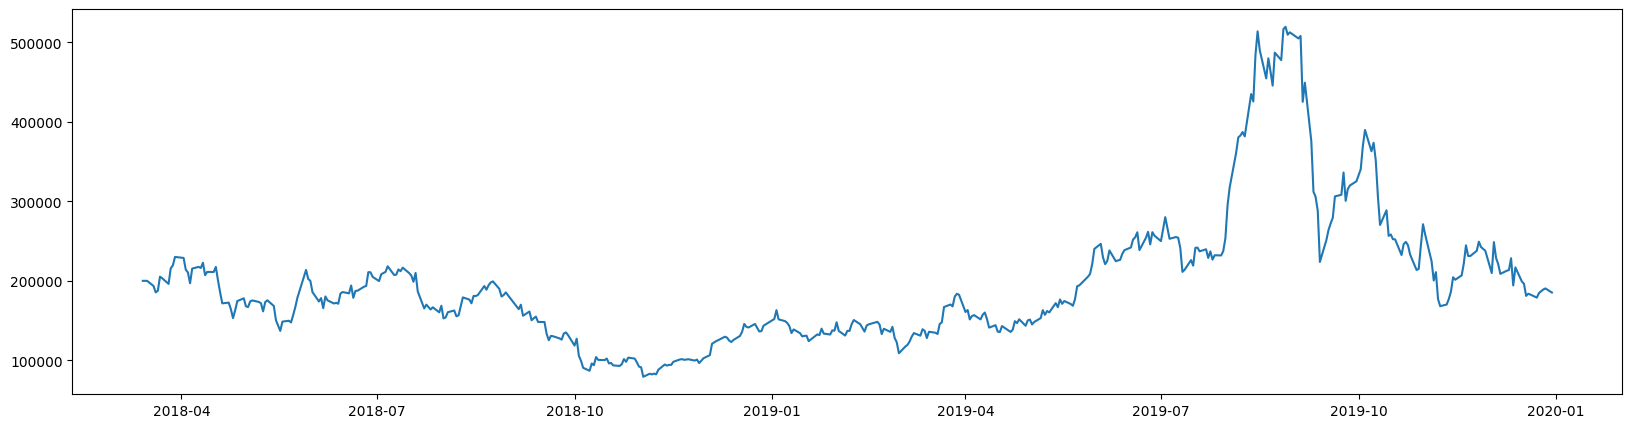

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(final_result['margin'], label='Cumulative PnL')

In [16]:
# final_result.to_csv("./training/MACD_training.csv")
final_result.to_csv("./testing/MACD_testing.csv")